In [281]:
# load the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import  statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

In [189]:
#Load the dataset
data =  pd.read_csv("D:/Log Reg/HR Analytics/HR.csv")

In [190]:
# look at the data
data.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [191]:
# We have 10 colums here
#Left is our response variable. Let's take it out
Y = data.left
data.drop("left",axis=1,inplace=True)

In [192]:
data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [193]:
#Let's make list of categorical and continuous vars
contVar =["satisfaction_level","last_evaluation","average_montly_hours"]
catVar =["number_project","time_spend_company","Work_accident","promotion_last_5years","sales","salary"]
# this comes in handy when we would like to do grouped operations e.g. filling missing values , creating a dataframe of one type
# of columns etc. we will use these ahead if need be.

In [194]:
# check for missing values
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [9]:
#no missing values !!! allrighty..
# let's take a look of our output variable to check if we have a balanced distribution or not.
# we will use frequency table since our variable is categorical.
pd.crosstab(index=Y,columns="Count").apply(lambda l:l/len(Y),axis=1)

col_0,Count
left,
0,0.761917
1,0.238083


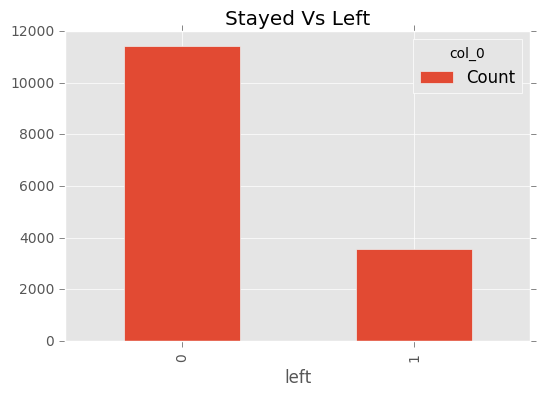

In [10]:
# we have a 1:3  ratio here. let's procced further. If we couldn't make good progress , we will look for advance sampling techniques
# such as over/under - sampling.
import matplotlib as mpl
mpl.style.use(["ggplot"])
pd.crosstab(index=Y,columns="Count").plot(kind="bar")
plt.title("Stayed Vs Left")

In [11]:
#Let's do data exploration to understand  how each individual ariable is behaving
# Starting with satisfaction_level       
# Initial observation - cont var having values between 0-1
data.satisfaction_level.describe()

count    14999.000000
mean         0.612834
std          0.248631
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64

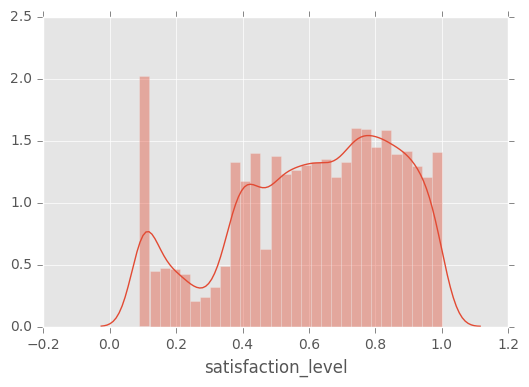

In [12]:
# A good thing to note is on average people are satisfied  with an everage value of 61 %. mean is also near median so I expect a
# somewhat normal distributed shape with a little left skeweness.
# draw a density plot and histogram
sns.distplot(data.satisfaction_level)

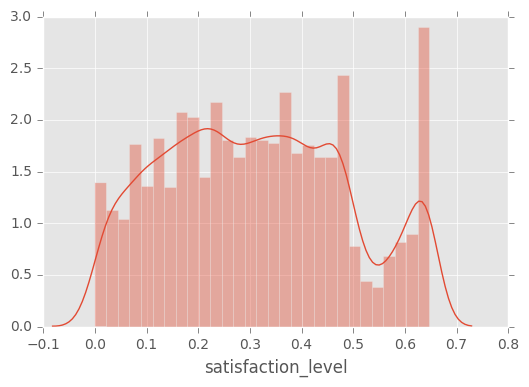

In [13]:
#look at the peak near 0.1, Looks like whosoever is dissatisfied, really not gonna listen to logic :)
# Let's try to do a reflected log transformation to tackle skewness
sns.distplot(np.log(max(data.satisfaction_level)+1-data.satisfaction_level))

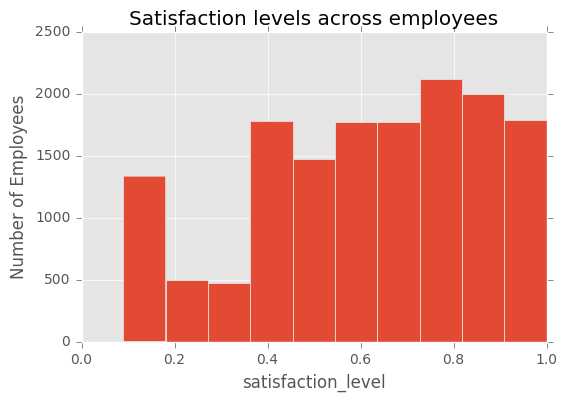

In [14]:
data["satisfaction_level"].plot(kind="hist")
plt.xlabel("satisfaction_level")
plt.ylabel("Number of Employees")
plt.title("Satisfaction levels across employees")
plt.show()


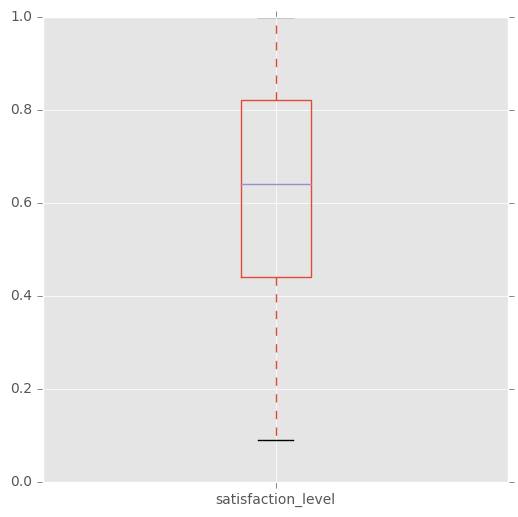

In [15]:
# do we have any outliers here (unusual values low or high)
data.satisfaction_level.plot(kind="box",figsize=(6,6))

In [16]:
#no outliers, just a little left skewed
# Let's analyze last_evaluation
# Let's start with boxplots this time

data.last_evaluation.describe()

count    14999.000000
mean         0.716102
std          0.171169
min          0.360000
25%          0.560000
50%          0.720000
75%          0.870000
max          1.000000
Name: last_evaluation, dtype: float64

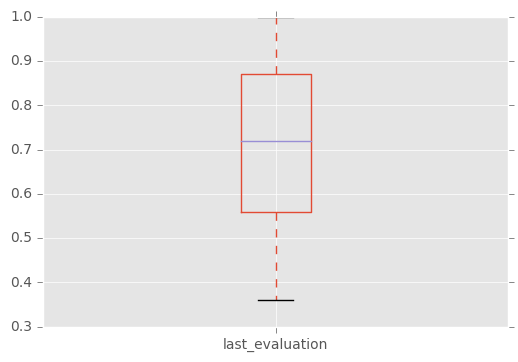

In [17]:
# Last evaluation is also distributed between 0 and 1. mean and median are quite close. nobody got evaluated less than 36 %
# but is 36 % good ? Around 50% of population is below 72 %. u got to perform really well to get good rating in this company.
data.last_evaluation.plot(kind ="box")


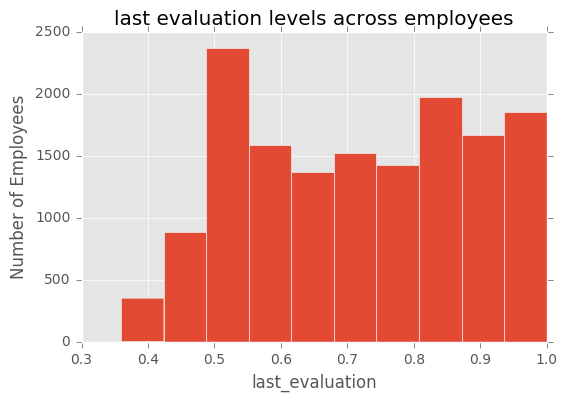

In [18]:
# no outliers and more normally distributed than satisfaction level
data.last_evaluation.plot(kind="hist")
plt.xlabel("last_evaluation")
plt.ylabel("Number of Employees")
plt.title("last evaluation levels across employees")
plt.show()


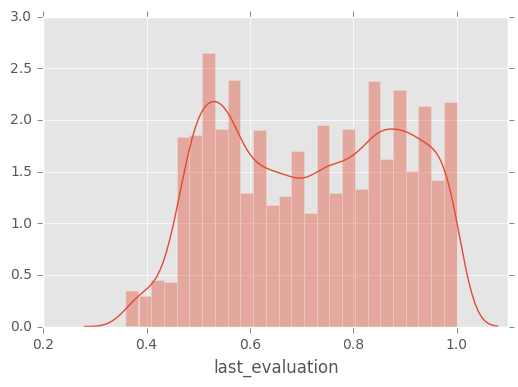

In [19]:
# one thing to catch here, there are more people who got higher rating(> 80 %) than who got low (60%). A peak is at 50 %
sns.distplot(data.last_evaluation)

In [20]:
#looks like a bi-modal distribution.our assumption of people getting higher evaluation holds true

In [21]:
#analyze the average_montly_hours
data.average_montly_hours.describe()

count    14999.000000
mean       201.050337
std         49.943099
min         96.000000
25%        156.000000
50%        200.000000
75%        245.000000
max        310.000000
Name: average_montly_hours, dtype: float64

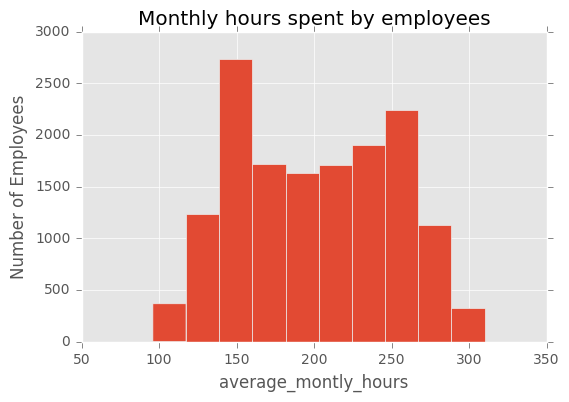

In [22]:
#looks good as mean and meadian are near
data.average_montly_hours.plot(kind="hist")
plt.xlabel("average_montly_hours")
plt.ylabel("Number of Employees")
plt.title("Monthly hours spent by employees")
plt.show()


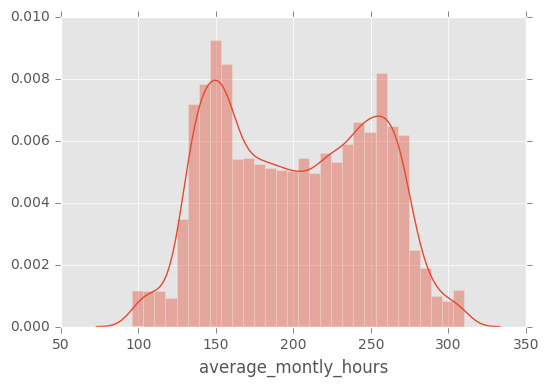

In [23]:
# could be a perfect normal distribution if we exclude these two peaks,around 150 and 250, People on average spend 200 hours 
#on monthly basis. but a good number of people are spending more than 250.
#could these be highly motivated(sarisfied) people or employees who got good evaluation. these answers can only be found by
# bivariate analysis
#We don't see any outlier, so sparing the boxplot.
sns.distplot(data.average_montly_hours)

In [24]:
#Again looks like a bimodal disribution

In [25]:

#let's look at categorical variables
print(data.number_project.unique())


[2 5 7 6 4 3]


In [26]:
#there are six values for number of projects an employee has worked on. We can consider taking as an ordinal variable as we know 
# that 3 is higher than 2
pd.crosstab(index=data.number_project,columns="Count").apply(lambda l:l/len(Y),axis=1)

col_0,Count
number_project,
2,0.159211
3,0.270351
4,0.291019
5,0.184079
6,0.078272
7,0.017068


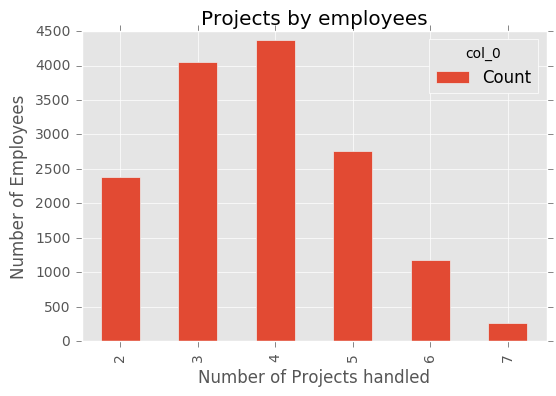

In [27]:
# very few people has worked on more than 5 projects and no fresher is here (eberybody has atleast worked on two projects) 
# 3 and 4 are prevailing categories
pd.crosstab(index=data.number_project,columns="Count").plot(kind="bar")
plt.xlabel("Number of Projects handled")
plt.ylabel("Number of Employees")
plt.title("Projects by employees")
plt.show()

In [28]:

print(data.time_spend_company.unique())

[ 3  6  4  5  2  8 10  7]


In [29]:
# 8 categories for number of years spent in company.Is there some bond for newbies ?
pd.crosstab(index=data.time_spend_company,columns="Count").apply(lambda l:l/len(Y),axis=1)

col_0,Count
time_spend_company,
2,0.216281
3,0.429562
4,0.170478
5,0.098207
6,0.047870
7,0.012534
8,0.010801
10,0.014268


In [30]:
#Around 82 % employees are equal or below 4 years. people tend to stay less ? People who are here for long time are more loyal ?
pd.crosstab(index=data.time_spend_company,columns=Y)

left,0,1
time_spend_company,,
2,3191,53
3,4857,1586
4,1667,890
5,640,833
6,509,209
7,188,0
8,162,0
10,214,0


In [31]:
# People who are here for more than 6 years won't leave and so only 2% of who are here for 2 years.
#~ 1/4 of from 3 years
# ~ 35 % of caegories 4 and 6
# it's an interesting trend. if people stay more than 6 , they become loyal but at high risk at year 5


In [32]:

print(data.Work_accident.unique())

[0 1]


In [33]:
# only two categories

pd.crosstab(index=data.Work_accident,columns="Count").apply(lambda l:l/len(Y),axis=1)

col_0,Count
Work_accident,
0,0.85539
1,0.14461


In [34]:
#Around 14 % people have had accidents. This should be minimized regardless of the effects on "left"
pd.crosstab(index=data.Work_accident,columns=Y)

left,0,1
Work_accident,,
0,9428,3402
1,2000,169


In [35]:
# well... it doesn't look if accident happened had something to do with why a person would leave a company.

In [36]:

pd.crosstab(index=data.promotion_last_5years,columns="Count").apply(lambda l:l/len(Y),axis=1)

col_0,Count
promotion_last_5years,
0,0.978732
1,0.021268


In [37]:
#very few employees got promotion last year. this should not be a factor for this year's attrition.
pd.crosstab(index=data.promotion_last_5years,columns=Y)

left,0,1
promotion_last_5years,,
0,11128,3552
1,300,19


In [38]:
#like we speculated. 
pd.crosstab(index=data.promotion_last_5years,columns=[data.time_spend_company,Y])

time_spend_company       2         3           4         5         6        \
left                      0   1     0     1     0    1    0    1    0    1   
promotion_last_5years                                                        
0                      3137  53  4738  1571  1635  887  624  832  492  209   
1                        54   0   119    15    32    3   16    1   17    0   

time_spend_company      7    8    10  
left                     0    0    0  
promotion_last_5years                 
0                      152  152  198  
1                       36   10   16

In [39]:
# no cross transaction as well

In [40]:

pd.crosstab(index=data.sales,columns="Count").apply(lambda l:l/len(Y))

col_0,Count
sales,
IT,0.081805
RandD,0.052470
accounting,0.051137
hr,0.049270
management,0.042003
marketing,0.057204
product_mng,0.060137
sales,0.276018
support,0.148610


In [41]:
# around 70 % employees from IT ,Sales,Support and technical. Shall we bin rest in a new category "Others" ?
pd.crosstab(index=data.sales,columns=Y)

left,0,1
sales,,
IT,954,273
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
support,1674,555


In [42]:
#I did not guess that. Accounting and HR have more attrition rate. Do they know about other jobs ?


In [43]:
# ["number_project","time_spend_company","Work_accident","promotion_last_5years","sales","salary"]
pd.crosstab(index=data.salary,columns="Count").apply(lambda l:l/len(Y))

col_0,Count
salary,
high,0.082472
low,0.487766
medium,0.429762


In [44]:
#Very few High end earning employees. No doubt people are leaving. Around half of the employees are on les salry than they deserv :)
pd.crosstab(index=data.salary,columns=Y)

left,0,1
salary,,
high,1155,82
low,5144,2172
medium,5129,1317


In [45]:
# we have a culprit here. Looks like salary plays a vtal role. employees with low salry doesn't leave . This can be an ordinal variable


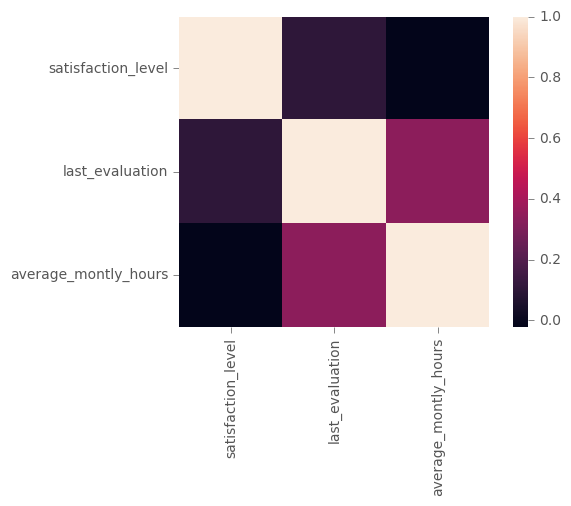

In [197]:
# let's quickly do a bivariate analysis for our numerical variables
# ["satisfaction_level","last_evaluation","average_montly_hours"]
# satisfaction_level" and last_evaluation"
cnDf = data.drop({column for column in data.keys() if column not in contVar},axis=1).copy()
ctDf = data.drop({column for column in data.keys() if column not in catVar},axis=1).copy()
corMat =cnDf.corr()
sns.heatmap(corMat,square=True,cbar=True,fmt="%.02f",)

In [198]:
# We can see that only last_evaluation and average_monthly_hours are correlated and hat two is weakly( around .40)

In [199]:
#Now we can start with data preprocessing.
# We will create dummy variables for categorical fields axcept for the ordinal ones
# we will standardize all the categorical variables to equal the effect of their coefficients.

In [200]:
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import OneHotEncoder,LabelEncoder
standardSc =StandardScaler()
x = cnDf.values
x_scaled = standardSc.fit_transform(x)
cnDf = pd.DataFrame(x_scaled,columns=cnDf.columns)

In [201]:
#creating dummies of categorical vars
workDF = pd.get_dummies(ctDf.Work_accident,prefix="Work_Accident")
salesDF = pd.get_dummies(ctDf.sales,prefix ="DepartMent")
promotionDf = pd.get_dummies(ctDf.promotion_last_5years,prefix="HadPromotion")

In [202]:
# get Final catgoricalDataset
colToKeep = ["number_project","time_spend_company","salary"]
ctDf = ctDf[colToKeep].join(workDF.ix[:,"Work_Accident_1":])

In [203]:
ctDf = ctDf.join(salesDF.ix[:,"DepartMent_RandD":])
ctDf = ctDf.join(promotionDf.ix[:,"HadPromotion_1":])

In [204]:
#now add our Final Dataset
finalData =  cnDf.join(ctDf)

In [205]:
finalData.head(1)

,satisfaction_level,last_evaluation,average_montly_hours,number_project,time_spend_company,salary,Work_Accident_1,DepartMent_RandD,DepartMent_accounting,DepartMent_hr,DepartMent_management,DepartMent_marketing,DepartMent_product_mng,DepartMent_sales,DepartMent_support,DepartMent_technical,HadPromotion_1
0,-0.936495,-1.087275,-0.88204,2,3,low,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [206]:
#Add an intercept term for the categories we deleted to avoid dummy var trap

# finalData["intercept"]=1
finalData["Left"]= Y

In [223]:
np.unique(Y1)

array([0., 1.])

In [207]:
# Perform data split 
train,test = train_test_split(finalData,test_size=.3)
finalData.head(1)

,satisfaction_level,last_evaluation,average_montly_hours,number_project,time_spend_company,salary,Work_Accident_1,DepartMent_RandD,DepartMent_accounting,DepartMent_hr,DepartMent_management,DepartMent_marketing,DepartMent_product_mng,DepartMent_sales,DepartMent_support,DepartMent_technical,HadPromotion_1,Left
0,-0.936495,-1.087275,-0.88204,2,3,low,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1


In [209]:
#Now perform Logistic regression, We will use Statsmodel's Logit function here to generate the model
f = "Left~satisfaction_level+last_evaluation+average_montly_hours+C(number_project)+C(time_spend_company)+C(salary)+Work_Accident_1+DepartMent_RandD+DepartMent_accounting+DepartMent_hr+DepartMent_management+DepartMent_marketing+DepartMent_product_mng+DepartMent_sales+DepartMent_support+DepartMent_technical+HadPromotion_1"
import patsy
Y,X = patsy.dmatrices(f, train, return_type='dataframe')
Y1,X1 =patsy.dmatrices(f, test, return_type='dataframe') 
model = smf.Logit(Y,X).fit(method="bfgs")

         Current function value: 0.256243
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


C:\Users\anurag dubey\Anaconda3\lib\site-packages\statsmodels-0.8.0-py3.5-win-amd64.egg\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [210]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:                   Left   No. Observations:                10499
Model:                          Logit   Df Residuals:                    10470
Method:                           MLE   Df Model:                           28
Date:                Sat, 12 May 2018   Pseudo R-squ.:                  0.5319
Time:                        01:52:47   Log-Likelihood:                -2690.3
converged:                      False   LL-Null:                       -5747.7
                                        LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -1.3143      0.242     -5.441      0.000      -1.788      -0.841
C(number_project)[T.3]         -5.6142      0.195    -28.852      0.000      -5.

In [ ]:
# We have got a model with Pseudo r squared .52
#Number of projects is a significant variable and shows a pattern that Log odds of person leaving company decrease as number of projects
# increases
# we see that for number of project & , log odds increase dramatically but it is insignificant in terms of associated p vales
# Log odds of a person leaving the company increase as Years in company increase but comes down as person complete six years
# log odds of person leaving company are higher for salary type low and then these are decreasing 
# log odds of leaving for a low salry person are .81 times higher than a person who is getting higher salary
# Satisfaction level as a negative impact on tendency to leave.For 1 unit increase in satisfaction will decrease the log odds of leaving by .52
#Last evaluation and average monthly hours seem to have postive effect on the log odds of leaing
# log odds 

In [213]:
pred =model.predict(X)

10499

In [242]:
from sklearn.metrics import classification_report,confusion_matrix,f1_score,precision_recall_curve,auc
fpr,tpr,thresholds= precision_recall_curve(Y,pred)
roc_auc = auc(fpr,tpr,reorder=True)
print ("Area under the curve is %.02f"% roc_auc)

Area under the curve is 0.53


In [249]:
def cutoff_youdens_j(fpr,tpr,thresholds):
    j_scores = tpr-fpr
    j_ordered = sorted(zip(j_scores,thresholds))
    return j_ordered[-1][1]
opt = cutoff_youdens_j(fpr,tpr,thresholds)

In [ ]:
#We have a f1 score of .79 with our base model on our whole data, this is a bad approach to test on the whole data as we are not 
# keeping anything for validation but I am just doing it to keep the act together.

In [273]:
bestF=0
bestP=0
prange = np.arange(min(pred),max(pred),.01)
for p in np.nditer(prange):
    pr = pred.apply(lambda l: 1 if l>p else 0)
    fScore = f1_score(Y,pr)
    if fScore>bestF:
        bestF= fScore
        bestP= p
    
    

In [276]:
pr = pred.apply(lambda l: 1 if l>bestP else 0)

In [279]:
print(classification_report(Y,pr))

             precision    recall  f1-score   support

          0       0.96      0.91      0.93      8012
          1       0.75      0.87      0.81      2487

avg / total       0.91      0.90      0.90     10499



In [280]:
#Pretty good for an initial model, Let's do it for the test Data
pred = model.predict(X1)
pr = pred.apply(lambda l: 1 if l>bestP else 0)
print(classification_report(Y1,pr))

             precision    recall  f1-score   support

        0.0       0.94      0.89      0.92      3416
        1.0       0.71      0.83      0.77      1084

avg / total       0.89      0.88      0.88      4500



In [287]:
#Let's check for mulicollinearity which is 1 assumption of logistic regression . i.e.  regressors should be independent
vif= pd.DataFrame()
vif["VIF_Factors"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["features"]= X.columns

In [305]:
vif

,VIF_Factors,features
0,37.319705,Intercept
1,2.575941,C(number_project)[T.3]
2,2.727112,C(number_project)[T.4]
3,2.440519,C(number_project)[T.5]
4,1.957522,C(number_project)[T.6]
5,1.372943,C(number_project)[T.7]
6,1.790217,C(time_spend_company)[T.3]
7,1.767936,C(time_spend_company)[T.4]
8,1.430580,C(time_spend_company)[T.5]
9,1.186473,C(time_spend_company)[T.6]


In [306]:
vif=None

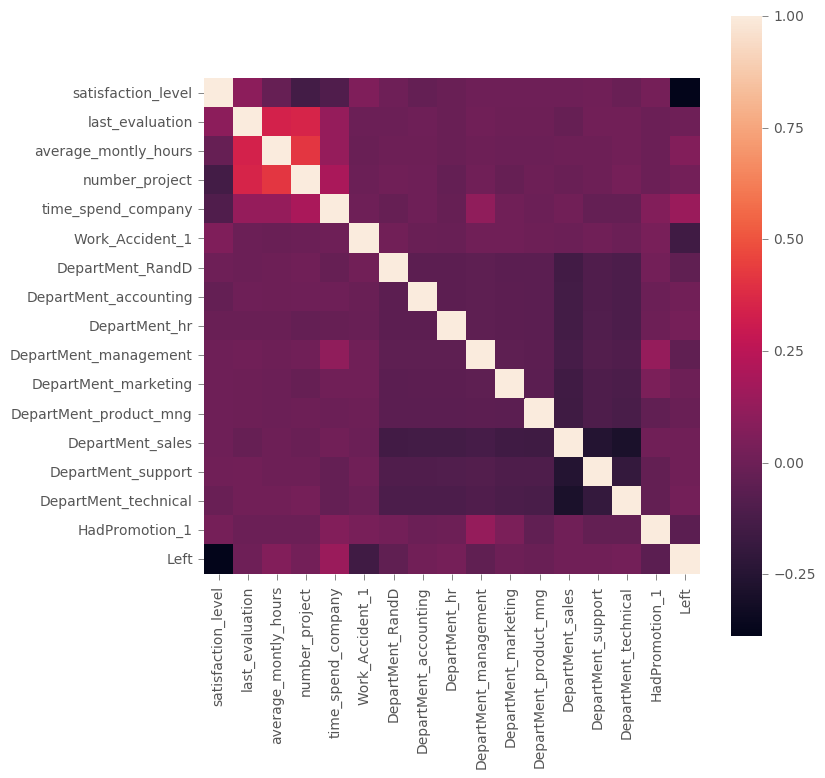

In [300]:
#looks like all the regressors are independent except intercept term, we can try mean centering(substract each vars mean from it)
# but our variables are already scaled, so we will leave it for now

# let's try interactions
# For this we will need to perform some bivariate EDA
# interaction among variables using Corrplot

corMat = finalData.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corMat,square=True,cbar=True)


In [291]:
#let's try a numerical appraoch
cols= corMat.nlargest(10,"Left")["Left"].index

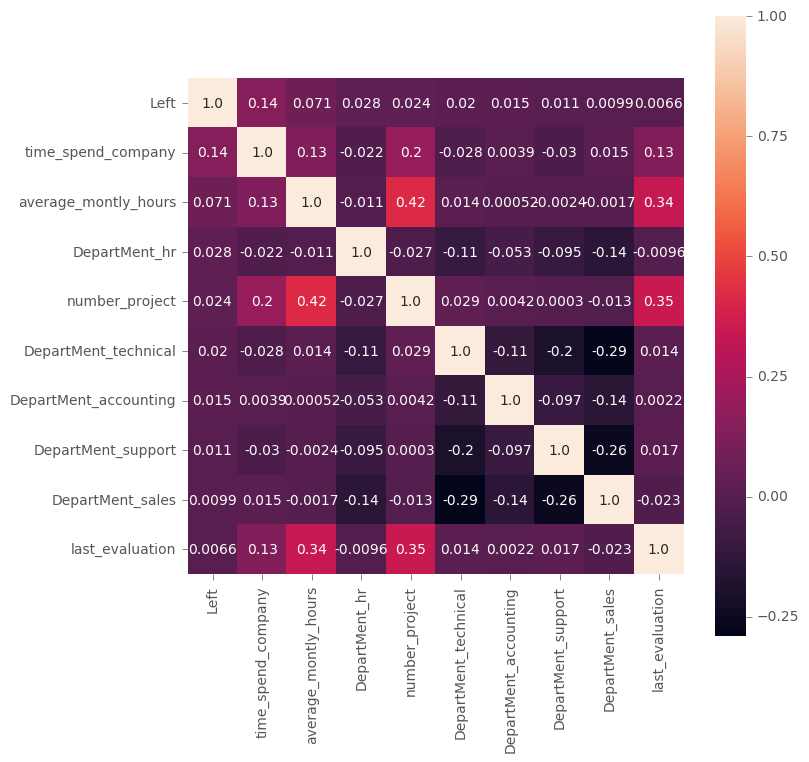

In [299]:
plt.figure(figsize=(8,8))
sns.heatmap(finalData[cols].corr(),annot=True,square=True,fmt=".2")
plt.show()

In [317]:
# we can see three vars AverageMonthlyHours, number_Projects and last_evaluation has correlation (not too high), let's try putting 
# an interaction
f =  "Left~satisfaction_level*average_montly_hours*last_evaluation+C(number_project)+C(time_spend_company)+C(salary)+Work_Accident_1+DepartMent_RandD+DepartMent_accounting+DepartMent_hr+DepartMent_management+DepartMent_marketing+DepartMent_product_mng+DepartMent_sales+DepartMent_support+DepartMent_technical+HadPromotion_1"
import patsy
Y,X = patsy.dmatrices(f, train, return_type='dataframe')
Y1,X1 = patsy.dmatrices(f, test, return_type='dataframe')
model = smf.Logit(Y,X).fit()
print(model.summary())

         Current function value: 0.200937
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                   Left   No. Observations:                10499
Model:                          Logit   Df Residuals:                    10466
Method:                           MLE   Df Model:                           32
Date:                Sat, 12 May 2018   Pseudo R-squ.:                  0.6330
Time:                        04:07:32   Log-Likelihood:                -2109.6
converged:                      False   LL-Null:                       -5747.7
                                        LLR p-value:                     0.000
                                                              coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
Intercept                                             

C:\Users\anurag dubey\Anaconda3\lib\site-packages\statsmodels-0.8.0-py3.5-win-amd64.egg\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [318]:
# we see .8% increase in pseudo R-Squared in this model
# Let's check the multicollinearity problem
vif_new=pd.DataFrame()
vif_new["VIF_Factors"]= [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif_new["Features"]= X.columns

In [319]:
vif_new

,VIF_Factors,Features
0,39.249192,Intercept
1,2.954986,C(number_project)[T.3]
2,3.141890,C(number_project)[T.4]
3,2.711973,C(number_project)[T.5]
4,2.382899,C(number_project)[T.6]
5,1.635473,C(number_project)[T.7]
6,1.800647,C(time_spend_company)[T.3]
7,1.796551,C(time_spend_company)[T.4]
8,1.501455,C(time_spend_company)[T.5]
9,1.207495,C(time_spend_company)[T.6]


In [320]:
#no  troubleSome entry found. all interactions are significant
#Let's try this models performance
pred =model.predict(X)
from sklearn.metrics import classification_report,confusion_matrix,f1_score,precision_recall_curve,auc
fpr,tpr,thresholds= precision_recall_curve(Y,pred)
roc_auc = auc(fpr,tpr,reorder=True)
print ("Area under the curve is %.02f"% roc_auc)

Area under the curve is 0.62


In [321]:
#AUC has increased to 62% now !
pr = pred.apply(lambda l: 1 if l>bestP else 0)
print(classification_report(Y,pr))
# even the f1 score is increased

             precision    recall  f1-score   support

        0.0       0.97      0.93      0.95      8012
        1.0       0.80      0.91      0.86      2487

avg / total       0.93      0.93      0.93     10499



In [322]:
print(confusion_matrix(Y,pr))

[[7456  556]
 [ 213 2274]]


In [323]:
#let's measure the preformance on test Data
pred = model.predict(X1)
pr = pred.apply(lambda l: 1 if l>bestP else 0)
print(classification_report(Y1,pr))


             precision    recall  f1-score   support

        0.0       0.96      0.92      0.94      3416
        1.0       0.77      0.88      0.82      1084

avg / total       0.91      0.91      0.91      4500



In [324]:
print(confusion_matrix(Y1,pr))

[[3129  287]
 [ 130  954]]


In [ ]:
# The overall f1 score on test data has increased by .3

In [ ]:
#We still have not considered the relationship among categorical variables

In [ ]:
# pred =model.predict(X)
# from sklearn.metrics import classification_report,confusion_matrix,f1_score,precision_recall_curve,auc
# fpr,tpr,thresholds= precision_recall_curve(Y,pred)
# roc_auc = auc(fpr,tpr,reorder=True)
# print ("Area under the curve is %.02f"% roc_auc)
# pr = pred.apply(lambda l: 1 if l>bestP else 0)
# #Pretty good for an initial model, Let's do it for the test Data
# pred = model.predict(X1)
# pr = pred.apply(lambda l: 1 if l>bestP else 0)
# print(classification_report(Y1,pr))

In [118]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import OneHotEncoder,LabelEncoder
# standardSc =StandardScaler()
# X= cnDf.values
# X=standardSc.fit_transform(X)
    
# labelList= ["number_project","time_spend_company","salary"]
# oneHotList =["Work_accident","promotion_last_5years","sales"]
# labelDF=data.drop({column for column in data.keys() if column not in labelList},axis=1).copy()
# oneHotDF= data.drop({column for column in data.keys() if column not in oneHotList},axis=1).copy()
# OneHotX = oneHotDF.values
# OneHotX= OneHotX.astype(str)
# labelX = labelDF.values
# labelX= labelX.astype(str)
# labelEnCd = LabelEncoder()
# onehotEncd = OneHotEncoder(sparse=False)
# features =[]
# for i in range(0,oneHotDF.shape[1]-1):
#     feature= LabelEncoder().fit_transform(OneHotX[:,i])
#     feature = feature.reshape(oneHotDF.shape[0],1)
#     cols = onehotEncd.fit_transform(feature)
#     features.append(cols)
# OneHotX = np.column_stack(features)

    
    

    
# #Label Encode the Output as well
# Y = LabelEncoder().fit_transform(Y)
# X_Encoded = np.concatenate([X,labelX,OneHotX],axis=1)
# np.unique(Y)

array([0, 1], dtype=int64)

In [ ]:
#We can try with a few more interactions but that may lead to overfitting. One point to note is that we have achived very good 
# results with logistic regression here. Next step could be running some powerfull non linear/boosting method to get more 
# accurate results.

# one important point to note is that we should not use Accuracy as measure in this kind of imbalanced scenario as the majority
# class will dominate the results